##  1. Understanding the data

In [1]:
import pandas as pd
import numpy as np
import sklearn
import statsmodels
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\Roger Arnold\Downloads\day.csv')

In [3]:
df.shape

(730, 16)

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## 2. EDA
- Null value inspection
- outlier treatment
- Dummy variable
- Univaraiate Analysis
- Bivariate Analysis

### Null value inspection

In [7]:
# Data cleaning.

# 1. Our data frame has no null values so we can consider all rows.
# 2.  Decimal number should hold double digits only.
# 3. Spot outliers in these columns. 

(df.isnull()==True).sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Our data does not have any null values

### Outlier Inspection 

In [8]:
df[["cnt","temp","hum","windspeed","atemp"]].describe(percentiles=[0.01 , 0.05, 0.1 , .25, .5, .75, .90, .95, .99])

,cnt,temp,hum,windspeed,atemp
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,4508.006849,20.319259,62.765175,12.763620,23.726322
std,1936.011647,7.506729,14.237589,5.195841,8.150308
min,22.000000,2.424346,0.000000,1.500244,3.953480
1%,689.380000,5.985470,31.209593,3.548993,7.290493
5%,1330.000000,8.747024,40.741735,5.326052,11.030712
10%,1742.600000,10.653165,45.000000,6.704754,12.752280
25%,3169.750000,13.811885,52.000000,9.041650,16.889713
50%,4548.500000,20.465826,62.625000,12.125325,24.368225
75%,5966.000000,26.880615,72.989575,15.625589,30.445775


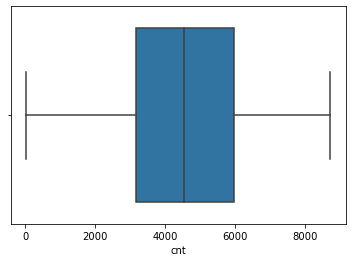

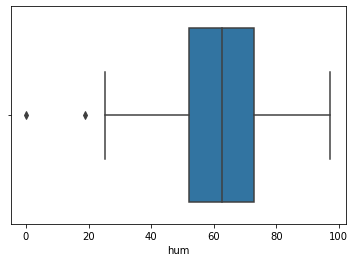

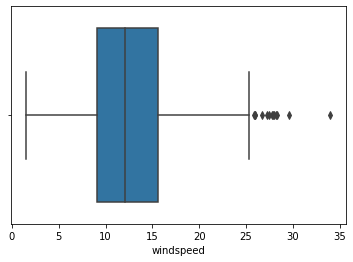

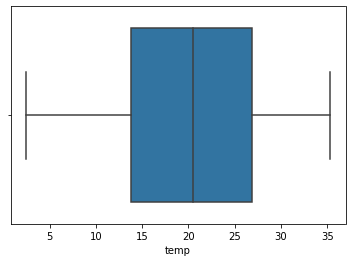

In [9]:
sns.boxplot(df["cnt"])
plt.show()
sns.boxplot(df["hum"])
plt.show()
sns.boxplot(df["windspeed"])
plt.show()
sns.boxplot(df["temp"])
plt.show()

Windspeed and humidity have some outliers, it's better to treat outliers everytime

- Considering 5% to 95% data for windspeed and humidity 

<AxesSubplot:xlabel='windspeed'>

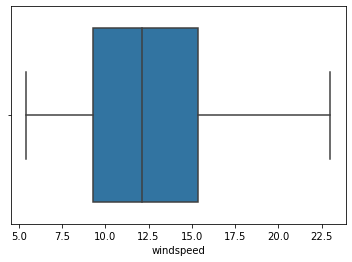

In [10]:
low_wind = df["windspeed"].quantile(0.05)
up_wind = df["windspeed"].quantile(0.95)

df = df[ (low_wind <= df["windspeed"]) & (up_wind >= df["windspeed"]) ]

sns.boxplot(df["windspeed"])

<AxesSubplot:xlabel='hum'>

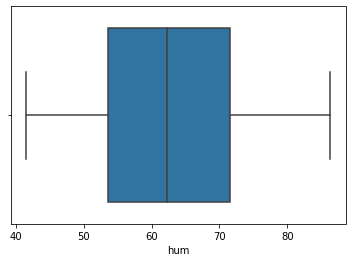

In [11]:
low_hum = df["hum"].quantile(0.05)
up_hum = df["hum"].quantile(0.95)

df = df[ (low_hum <= df["hum"]) & (up_hum >= df["hum"]) ]

sns.boxplot(df["hum"])

No outliers present in our data

###  Data Visualization

Numerical Variables

<Figure size 1800x576 with 0 Axes>

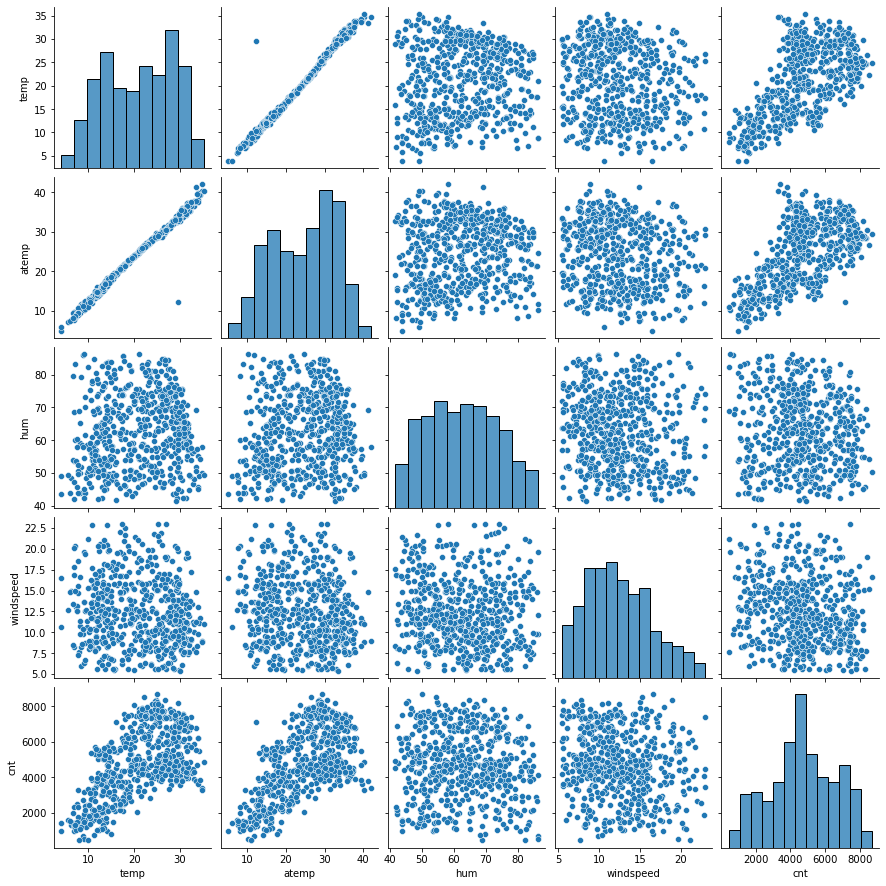

In [12]:
plt.figure( figsize=(25,8))
sns.pairplot(df[["temp","atemp","hum","windspeed","cnt"]])
plt.show()

Since "atemp" is highly correlated with "temp" we can drop either one of them

In [13]:
df.drop(columns =["atemp"],inplace = True)

We have separate clumns for year, months and days, so we drop "dteday" column

In [14]:
df.drop(columns =["dteday"],inplace = True)

In [15]:
df.drop(columns =["instant"],inplace = True)

In [16]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,82,1518,1600


Mapping categoriical variables

In [17]:
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          426
hum           479
windspeed     527
casual        509
registered    553
cnt           568
dtype: int64

We have four categorical vairables which needs dummy variables.

- Season
- Month
- Weekday
- Weathersit

In [18]:
df["season"] = df["season"].map(

    {
        1:"spring",2:"summer",3:"fall",4:"winter"
        
    }
)

In [19]:
df["weathersit"] = df["weathersit"].map(

    {
        1 : "Clear", 2:"Mist",3:"Light snow" , 4 : "Heavy Rain"
    }
)

In [20]:
df["weekday"] = df["weekday"].map(

    {
        0 : "Tuesday", 1:"Wednesday",2:"Thursday",3:"Friday",4:"Saturday",5:"Sunday",6:"Monday"    
    }
)

In [21]:
df["mnth"] = df["mnth"].map({
    
    1 : "January",
    2 : "February",
    3 : "March",
    4  : "April",
    5 : "May",
    6 : "June",
    7 : "July",
    8  :"August",
    9 : "September",
    10: "October",
    11: "November",
    12 : "December"
})

In [22]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,spring,0,January,0,Monday,0,Mist,14.110847,80.5833,10.749882,331,654,985
1,spring,0,January,0,Tuesday,0,Mist,14.902598,69.6087,16.652113,131,670,801
2,spring,0,January,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,120,1229,1349
3,spring,0,January,0,Thursday,1,Clear,8.200000,59.0435,10.739832,108,1454,1562
4,spring,0,January,0,Friday,1,Clear,9.305237,43.6957,12.522300,82,1518,1600


### Univariate Analysis

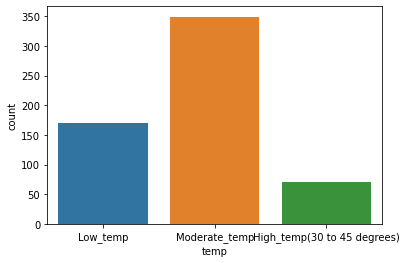

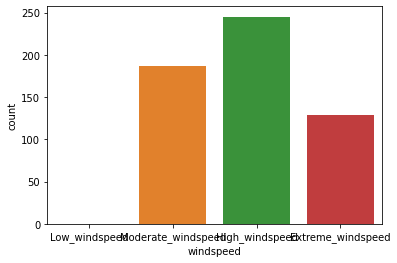

In [156]:
analysis = pd.DataFrame()
temp_bins = [0,15,30,45]
temp_lables = ["Low_temp","Moderate_temp","High_temp(30 to 45 degrees)"]
windspeed_bins = [0,5,10,15,20]
windspeed_labels=["Low_windspeed","Moderate_windspeed","High_windspeed","Extreme_windspeed"]

analysis["temp"] = pd.cut(df["temp"],bins = temp_bins,labels = temp_lables)
analysis["windspeed"] = pd.cut(df["windspeed"],bins = windspeed_bins,labels = windspeed_labels)

sns.countplot(analysis["temp"])
plt.show()
sns.countplot(analysis["windspeed"])
plt.show()

### Binvariate Analysis

Behaviour of categorical variables with "Count"

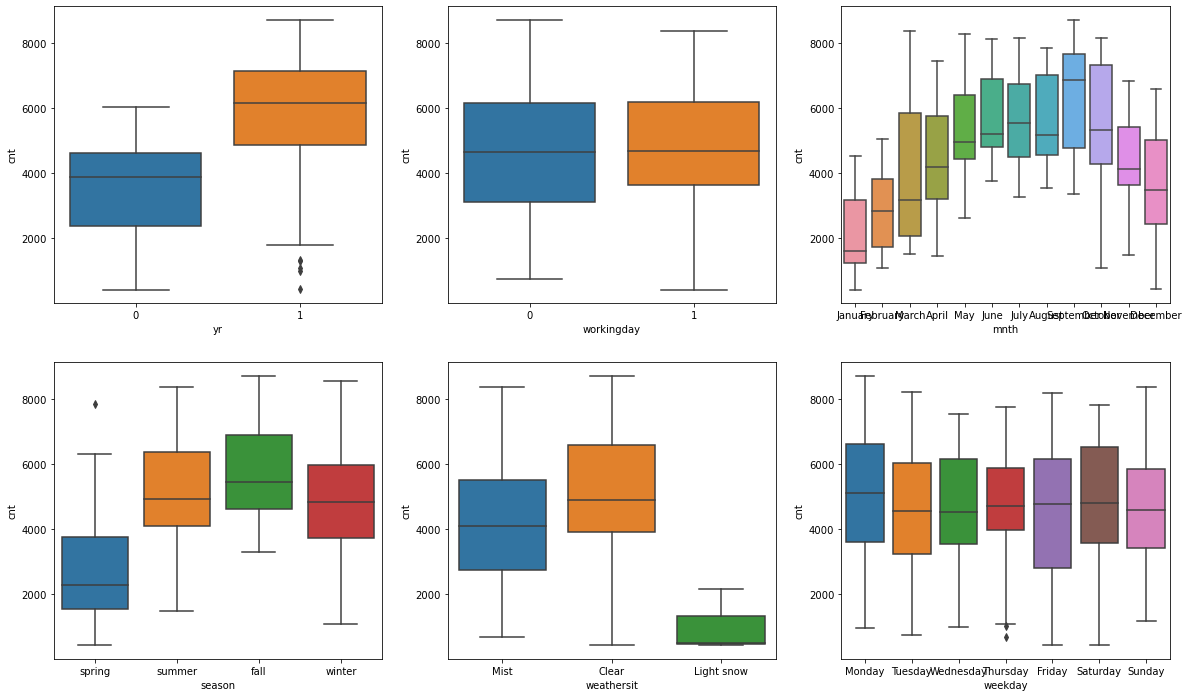

In [25]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.show()

### Introducing dummy variables

In [26]:
weathersit_dummy = pd.get_dummies(df['weathersit'])

In [27]:
season_dummy = pd.get_dummies(df['season'],drop_first=True)

In [28]:
weekday_dummmy = pd.get_dummies(df['weekday'],drop_first=True,prefix='Weekday')

In [29]:
month_dummy = pd.get_dummies(df['mnth'],drop_first=True,prefix='Month')

In [30]:
df = pd.concat([df,weathersit_dummy],axis=1)
df = pd.concat([df,season_dummy],axis=1)
df = pd.concat([df,weekday_dummmy],axis=1)
df = pd.concat([df,month_dummy],axis=1)

In [31]:
df.drop(columns=['weathersit','season','casual','registered','weekday','mnth'],inplace=True)

In [32]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Clear,Light snow,Mist,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [33]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'Clear', 'Light snow', 'Mist', 'spring', 'summer', 'winter',
       'Weekday_Monday', 'Weekday_Saturday', 'Weekday_Sunday',
       'Weekday_Thursday', 'Weekday_Tuesday', 'Weekday_Wednesday',
       'Month_August', 'Month_December', 'Month_February', 'Month_January',
       'Month_July', 'Month_June', 'Month_March', 'Month_May',
       'Month_November', 'Month_October', 'Month_September'],
      dtype='object')

## 3.  Splitting data to train and test

In [34]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [35]:
df_train.shape

(413, 30)

In [36]:
df_test.shape

(177, 30)

In [37]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Clear,Light snow,Mist,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


## 4. Scaling the data


In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()

In [40]:
numerical_variables = ['yr','temp','hum','windspeed','cnt']

df_train[numerical_variables] = scaler.fit_transform(df_train[numerical_variables])

In [41]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,cnt,Clear,Light snow,Mist,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
422,1.0,0,1,0.353064,0.169775,0.713271,0.469757,1,0,0,...,0,1,0,0,0,0,0,0,0,0
56,0.0,0,0,0.243063,0.275187,0.402856,0.185682,1,0,0,...,0,1,0,0,0,0,0,0,0,0
403,1.0,0,1,0.209301,0.689366,0.201468,0.286249,0,0,1,...,0,1,0,0,0,0,0,0,0,0
62,0.0,0,1,0.215835,0.437500,0.466778,0.182663,0,0,1,...,0,0,0,0,0,1,0,0,0,0
240,0.0,0,1,0.705938,0.312499,0.300939,0.507425,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,1.0,0,1,0.241974,0.510262,0.191972,0.625377,1,0,0,...,1,0,0,0,0,0,0,0,0,0
70,0.0,0,0,0.304054,0.402051,0.533192,0.205360,1,0,0,...,0,0,0,0,0,1,0,0,0,0
443,1.0,0,1,0.606828,0.879664,0.154026,0.683569,1,0,0,...,0,0,0,0,0,1,0,0,0,0
104,0.0,1,0,0.457619,0.573694,0.554531,0.325365,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Clear,Light snow,Mist,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,...,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,0.506053,0.026634,0.670702,0.545126,0.471495,0.406009,0.511801,0.677966,0.004843,0.317191,...,0.077482,0.067797,0.084746,0.094431,0.101695,0.082324,0.094431,0.065375,0.077482,0.087167
std,0.500570,0.161208,0.470528,0.242397,0.253325,0.231351,0.230294,0.467823,0.069504,0.465947,...,0.267679,0.251701,0.278841,0.292782,0.302613,0.275192,0.292782,0.247487,0.267679,0.282422
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.327304,0.261195,0.229887,0.358807,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.569798,0.471082,0.383913,0.509236,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.763661,0.675373,0.556863,0.690813,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


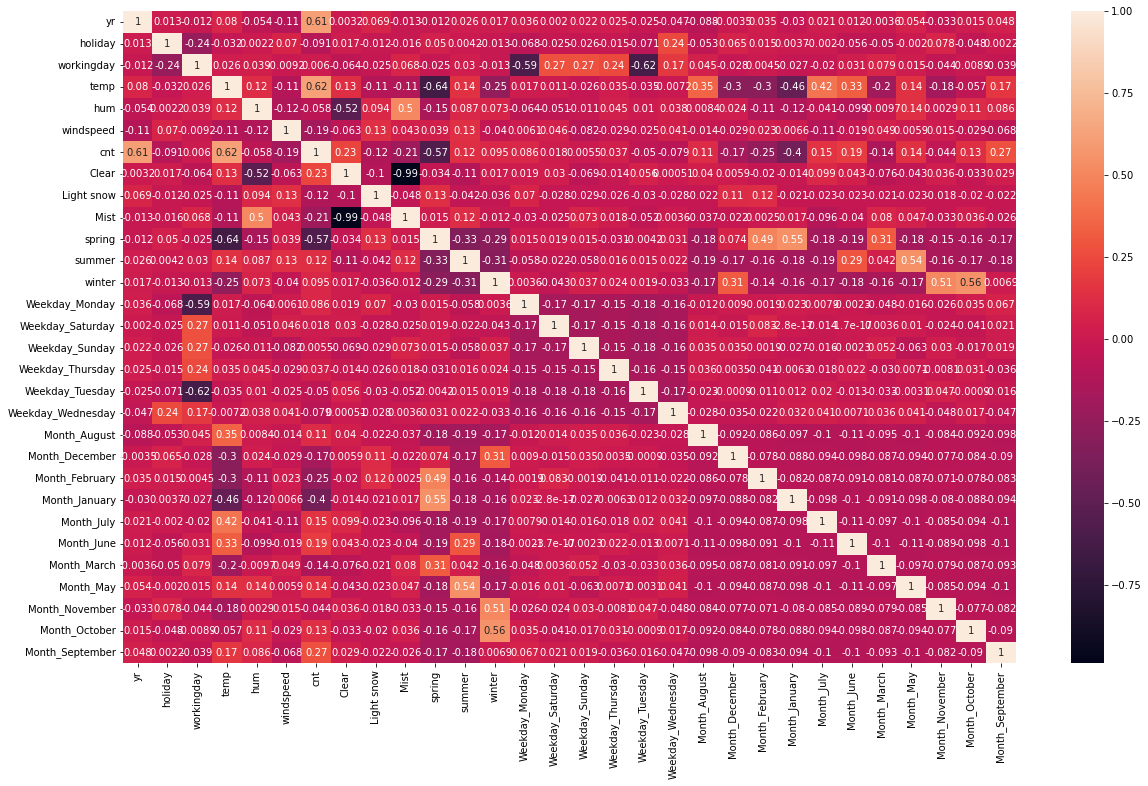

In [43]:
plt.figure(figsize = (20, 12))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

### Our aim is to add all variables and perform manual feature elimination

The features must satisfy these conditions to stay in the dataframe:
- P vlaue < 0.05
- Variance Inflation factor < 5

In [44]:
y_train = df_train.pop('cnt')
X_train = df_train

In [45]:
X_train_rfe = df_train

In [46]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [47]:
lr.params

const                0.073641
yr                   0.251116
holiday             -0.046083
workingday           0.032924
temp                 0.393895
hum                 -0.080229
windspeed           -0.062012
Clear                0.120488
Light snow          -0.109418
Mist                 0.062571
spring              -0.071036
summer               0.031279
winter               0.106097
Weekday_Monday       0.065317
Weekday_Saturday     0.013567
Weekday_Sunday       0.006511
Weekday_Thursday     0.006613
Weekday_Tuesday      0.021482
Weekday_Wednesday   -0.006333
Month_August         0.022499
Month_December      -0.050821
Month_February      -0.031062
Month_January       -0.058274
Month_July          -0.022242
Month_June           0.018765
Month_March          0.022059
Month_May            0.041810
Month_November      -0.040980
Month_October        0.035723
Month_September      0.125722
dtype: float64

In [48]:
X_train.shape

(413, 29)

In [49]:
lr.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,0.0736,0.033,2.263,0.024,0.010,0.138
yr,0.2511,0.009,26.636,0.000,0.233,0.270
holiday,-0.0461,0.026,-1.760,0.079,-0.098,0.005
workingday,0.0329,0.012,2.650,0.008,0.008,0.057
temp,0.3939,0.053,7.500,0.000,0.291,0.497
hum,-0.0802,0.023,-3.421,0.001,-0.126,-0.034
windspeed,-0.0620,0.021,-2.979,0.003,-0.103,-0.021
Clear,0.1205,0.022,5.601,0.000,0.078,0.163
Light snow,-0.1094,0.052,-2.111,0.035,-0.211,-0.008
Mist,0.0626,0.021,3.001,0.003,0.022,0.104


Eliminating features by p value:

Order of precedence:

1. Weekday_Wednesday
2. Weekday_Thursday
3. Weekday_Sunday
4. Month_July
5. Month_August

#### Removing "Weekday_Wednesday"

- high p value : 0.714

In [50]:
X_train.drop(columns=["Weekday_Wednesday"],inplace=True)

In [51]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [52]:
lr_1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,0.0723,0.032,2.238,0.026,0.009,0.136
yr,0.2511,0.009,26.668,0.000,0.233,0.270
holiday,-0.0495,0.024,-2.024,0.044,-0.098,-0.001
workingday,0.0317,0.012,2.650,0.008,0.008,0.055
temp,0.3957,0.052,7.574,0.000,0.293,0.498
hum,-0.0807,0.023,-3.448,0.001,-0.127,-0.035
windspeed,-0.0621,0.021,-2.987,0.003,-0.103,-0.021
Clear,0.1194,0.021,5.610,0.000,0.078,0.161
Light snow,-0.1088,0.052,-2.102,0.036,-0.211,-0.007
Mist,0.0616,0.021,2.982,0.003,0.021,0.102


#### Removing "Weekday_Thursday"

- high p value : 0.539

In [53]:
X_train.drop(columns=["Weekday_Thursday"],inplace=True)

In [54]:
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train)
lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [55]:
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     90.79
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          4.42e-145
Time:                        22:01:24   Log-Likelihood:                 418.74
No. Observations:                 413   AIC:                            -785.5
Df Residuals:                     387   BIC:                            -680.9
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0727      0.032      2.254      0.025       0.009       0.136
yr                   0.2514      0.009     26.738      0.000       0.233       0.270
holiday             -0.0491      0.024     -2.010      0.045      -0.097      -0.001
workingday           0.0337      0.012      2.922      0.004       0.011       0.056
temp                 0.3963      0.052      7.593      0.000       0.294       0.499
hum                 -0.0807      0.023     -3.452      0.001      -0.127      -0.035
windspeed           -0.0626      0.021     -3.015      0.003      -0.103      -0.022
Clear                0.1200      0.021      5.647      0.000       0.078       0.162
Light snow          -0.1096      0.052     -2.120      0.035      -0.211      -0.008
Mist                 0.0623      0.021      3.022      0.003       0.022       0.103
spring              -0.0706      0.034     -2.095      0.037      -0.137      -0.004
summer               0.0316      0.027      1.175      0.241      -0.021       0.084
winter               0.1060      0.031      3.426      0.001       0.045       0.167
Weekday_Monday       0.0660      0.014      4.869      0.000       0.039       0.093
Weekday_Saturday     0.0136      0.014      0.974      0.331      -0.014       0.041
Weekday_Sunday       0.0065      0.014      0.464      0.643      -0.021       0.034
Weekday_Tuesday      0.0222      0.013      1.655      0.099      -0.004       0.049
Month_August         0.0219      0.036      0.603      0.547      -0.050       0.093
Month_December      -0.0503      0.039     -1.293      0.197      -0.127       0.026
Month_February      -0.0314      0.039     -0.801      0.424      -0.108       0.046
Month_January       -0.0585      0.040     -1.457      0.146      -0.137       0.020
Month_July          -0.0238      0.037     -0.641      0.522      -0.097       0.049
Month_June           0.0176      0.027      0.648      0.517      -0.036       0.071
Month_March          0.0211      0.031      0.690      0.490      -0.039       0.081
Month_May            0.0407      0.023      1.739      0.083      -0.005       0.087
Month_November      -0.0404      0.042     -0.959      0.338      -0.123       0.042
Month_October        0.0355      0.041      0.870      0.385      -0.045       0.116
Month_September      0.1252      0.034      3.673      0.000       0.058       0.192
==============================================================================
Omnibus:                       74.937   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.099
Skew:                          -0.821   Prob(JB):                     3.98e-51
Kurtosis:                       6.285   Cond. No.                     1.62e+16
=====================================================

#### Removing "Weekday_Sunday"
- high p value : 0.643	

In [56]:
X_train.drop(columns=["Weekday_Sunday"],inplace=True)

In [57]:
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train)
lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [58]:
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     94.76
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          5.00e-146
Time:                        22:01:24   Log-Likelihood:                 418.62
No. Observations:                 413   AIC:                            -787.2
Df Residuals:                     388   BIC:                            -686.7
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0734      0.032      2.278      0.023       0.010       0.137
yr                   0.2515      0.009     26.784      0.000       0.233       0.270
holiday             -0.0488      0.024     -2.000      0.046      -0.097      -0.001
workingday           0.0349      0.011      3.121      0.002       0.013       0.057
temp                 0.3957      0.052      7.592      0.000       0.293       0.498
hum                 -0.0815      0.023     -3.500      0.001      -0.127      -0.036
windspeed           -0.0633      0.021     -3.063      0.002      -0.104      -0.023
Clear                0.1202      0.021      5.664      0.000       0.078       0.162
Light snow          -0.1099      0.052     -2.128      0.034      -0.211      -0.008
Mist                 0.0630      0.021      3.067      0.002       0.023       0.103
spring              -0.0703      0.034     -2.087      0.038      -0.136      -0.004
summer               0.0316      0.027      1.178      0.239      -0.021       0.084
winter               0.1062      0.031      3.434      0.001       0.045       0.167
Weekday_Monday       0.0655      0.013      4.852      0.000       0.039       0.092
Weekday_Saturday     0.0119      0.013      0.884      0.377      -0.015       0.038
Weekday_Tuesday      0.0217      0.013      1.627      0.105      -0.005       0.048
Month_August         0.0226      0.036      0.625      0.533      -0.049       0.094
Month_December      -0.0499      0.039     -1.285      0.199      -0.126       0.026
Month_February      -0.0314      0.039     -0.802      0.423      -0.108       0.046
Month_January       -0.0588      0.040     -1.468      0.143      -0.138       0.020
Month_July          -0.0233      0.037     -0.629      0.529      -0.096       0.050
Month_June           0.0180      0.027      0.662      0.508      -0.035       0.071
Month_March          0.0213      0.031      0.698      0.485      -0.039       0.081
Month_May            0.0407      0.023      1.741      0.083      -0.005       0.087
Month_November      -0.0398      0.042     -0.948      0.344      -0.122       0.043
Month_October        0.0356      0.041      0.873      0.383      -0.045       0.116
Month_September      0.1259      0.034      3.703      0.000       0.059       0.193
==============================================================================
Omnibus:                       74.818   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.147
Skew:                          -0.820   Prob(JB):                     3.89e-51
Kurtosis:                       6.287   Cond. No.                     1.59e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matr

#### Dropping "Month_August"
- high p value : 0.533

In [59]:
X_train.drop(columns=["Month_August"],inplace=True)

In [60]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
lr_4 = sm.OLS(y_train,X_train_lm).fit()

In [61]:
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.02
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          6.02e-147
Time:                        22:01:24   Log-Likelihood:                 418.42
No. Observations:                 413   AIC:                            -788.8
Df Residuals:                     389   BIC:                            -692.3
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0812      0.030      2.739      0.006       0.023       0.139
yr                   0.2509      0.009     26.860      0.000       0.233       0.269
holiday             -0.0475      0.024     -1.955      0.051      -0.095       0.000
workingday           0.0371      0.011      3.489      0.001       0.016       0.058
temp                 0.4062      0.049      8.234      0.000       0.309       0.503
hum                 -0.0824      0.023     -3.548      0.000      -0.128      -0.037
windspeed           -0.0641      0.021     -3.111      0.002      -0.105      -0.024
Clear                0.1215      0.021      5.761      0.000       0.080       0.163
Light snow          -0.1051      0.051     -2.060      0.040      -0.205      -0.005
Mist                 0.0647      0.020      3.180      0.002       0.025       0.105
spring              -0.0776      0.032     -2.457      0.014      -0.140      -0.015
summer               0.0207      0.020      1.017      0.310      -0.019       0.061
winter               0.1025      0.030      3.379      0.001       0.043       0.162
Weekday_Monday       0.0675      0.013      5.160      0.000       0.042       0.093
Weekday_Saturday     0.0116      0.013      0.864      0.388      -0.015       0.038
Weekday_Tuesday      0.0240      0.013      1.874      0.062      -0.001       0.049
Month_December      -0.0585      0.036     -1.613      0.108      -0.130       0.013
Month_February      -0.0375      0.038     -0.990      0.323      -0.112       0.037
Month_January       -0.0639      0.039     -1.628      0.104      -0.141       0.013
Month_July          -0.0427      0.020     -2.111      0.035      -0.083      -0.003
Month_June           0.0064      0.020      0.323      0.747      -0.033       0.045
Month_March          0.0153      0.029      0.529      0.597      -0.042       0.072
Month_May            0.0345      0.021      1.631      0.104      -0.007       0.076
Month_November      -0.0505      0.038     -1.317      0.189      -0.126       0.025
Month_October        0.0238      0.036      0.658      0.511      -0.047       0.095
Month_September      0.1094      0.021      5.123      0.000       0.067       0.151
==============================================================================
Omnibus:                       74.640   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.220
Skew:                          -0.822   Prob(JB):                     2.77e-50
Kurtosis:                       6.249   Cond. No.                     1.71e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.67e-30. Thi

Dropping "Month_June"

In [62]:
X_train.drop(columns=["Month_June"],inplace=True)

In [63]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
lr_5 = sm.OLS(y_train,X_train_lm).fit()

In [64]:
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     103.7
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          6.15e-148
Time:                        22:01:25   Log-Likelihood:                 418.36
No. Observations:                 413   AIC:                            -790.7
Df Residuals:                     390   BIC:                            -698.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0800      0.029      2.723      0.007       0.022       0.138
yr                   0.2508      0.009     26.911      0.000       0.232       0.269
holiday             -0.0483      0.024     -2.000      0.046      -0.096      -0.001
workingday           0.0370      0.011      3.484      0.001       0.016       0.058
temp                 0.4124      0.045      9.090      0.000       0.323       0.502
hum                 -0.0838      0.023     -3.675      0.000      -0.129      -0.039
windspeed           -0.0649      0.020     -3.167      0.002      -0.105      -0.025
Clear                0.1206      0.021      5.783      0.000       0.080       0.162
Light snow          -0.1046      0.051     -2.054      0.041      -0.205      -0.004
Mist                 0.0641      0.020      3.168      0.002       0.024       0.104
spring              -0.0758      0.031     -2.441      0.015      -0.137      -0.015
summer               0.0231      0.019      1.221      0.223      -0.014       0.060
winter               0.1035      0.030      3.433      0.001       0.044       0.163
Weekday_Monday       0.0674      0.013      5.157      0.000       0.042       0.093
Weekday_Saturday     0.0116      0.013      0.867      0.386      -0.015       0.038
Weekday_Tuesday      0.0239      0.013      1.867      0.063      -0.001       0.049
Month_December      -0.0583      0.036     -1.610      0.108      -0.130       0.013
Month_February      -0.0379      0.038     -1.002      0.317      -0.112       0.036
Month_January       -0.0637      0.039     -1.624      0.105      -0.141       0.013
Month_July          -0.0449      0.019     -2.348      0.019      -0.082      -0.007
Month_March          0.0141      0.029      0.493      0.622      -0.042       0.071
Month_May            0.0314      0.019      1.664      0.097      -0.006       0.069
Month_November      -0.0506      0.038     -1.320      0.188      -0.126       0.025
Month_October        0.0230      0.036      0.640      0.523      -0.048       0.094
Month_September      0.1083      0.021      5.141      0.000       0.067       0.150
==============================================================================
Omnibus:                       73.469   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.331
Skew:                          -0.813   Prob(JB):                     5.27e-49
Kurtosis:                       6.206   Cond. No.                     3.01e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.5e-30. This might indicate that there are
strong multicollinearity problems or that the design m

#### Dropping "Month_March"
- high p value  : 0.493

In [65]:
X_train.drop(columns=["Month_March"],inplace=True)

In [66]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
lr_5 = sm.OLS(y_train,X_train_lm).fit()

In [67]:
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     108.9
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          6.56e-149
Time:                        22:01:25   Log-Likelihood:                 418.23
No. Observations:                 413   AIC:                            -792.5
Df Residuals:                     391   BIC:                            -704.0
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0837      0.028      2.951      0.003       0.028       0.139
yr                   0.2512      0.009     27.108      0.000       0.233       0.269
holiday             -0.0477      0.024     -1.983      0.048      -0.095      -0.000
workingday           0.0382      0.010      3.699      0.000       0.018       0.058
temp                 0.4036      0.042      9.693      0.000       0.322       0.485
hum                 -0.0826      0.023     -3.647      0.000      -0.127      -0.038
windspeed           -0.0651      0.020     -3.185      0.002      -0.105      -0.025
Clear                0.1229      0.020      6.055      0.000       0.083       0.163
Light snow          -0.1053      0.051     -2.071      0.039      -0.205      -0.005
Mist                 0.0662      0.020      3.351      0.001       0.027       0.105
spring              -0.0672      0.026     -2.612      0.009      -0.118      -0.017
summer               0.0227      0.019      1.202      0.230      -0.014       0.060
winter               0.1077      0.029      3.726      0.000       0.051       0.165
Weekday_Monday       0.0685      0.013      5.331      0.000       0.043       0.094
Weekday_Saturday     0.0121      0.013      0.902      0.367      -0.014       0.038
Weekday_Tuesday      0.0248      0.013      1.955      0.051      -0.000       0.050
Month_December      -0.0691      0.029     -2.399      0.017      -0.126      -0.012
Month_February      -0.0516      0.026     -2.022      0.044      -0.102      -0.001
Month_January       -0.0783      0.026     -3.061      0.002      -0.129      -0.028
Month_July          -0.0451      0.019     -2.361      0.019      -0.083      -0.008
Month_May            0.0296      0.019      1.601      0.110      -0.007       0.066
Month_November      -0.0591      0.034     -1.731      0.084      -0.126       0.008
Month_October        0.0153      0.032      0.473      0.636      -0.048       0.079
Month_September      0.1054      0.020      5.217      0.000       0.066       0.145
==============================================================================
Omnibus:                       74.287   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.963
Skew:                          -0.817   Prob(JB):                     3.15e-50
Kurtosis:                       6.252   Cond. No.                     2.67e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.91e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Dropping "Month_October" 
- high p value : 0.636

In [68]:
X_train.drop(columns=["Month_October"],inplace=True)

In [69]:
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train)
lr_6 = sm.OLS(y_train,X_train_lm).fit()

In [70]:
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     114.5
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          6.76e-150
Time:                        22:01:25   Log-Likelihood:                 418.12
No. Observations:                 413   AIC:                            -794.2
Df Residuals:                     392   BIC:                            -709.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0861      0.028      3.086      0.002       0.031       0.141
yr                   0.2512      0.009     27.138      0.000       0.233       0.269
holiday             -0.0462      0.024     -1.938      0.053      -0.093       0.001
workingday           0.0382      0.010      3.704      0.000       0.018       0.058
temp                 0.4011      0.041      9.721      0.000       0.320       0.482
hum                 -0.0812      0.022     -3.620      0.000      -0.125      -0.037
windspeed           -0.0653      0.020     -3.196      0.002      -0.105      -0.025
Clear                0.1230      0.020      6.071      0.000       0.083       0.163
Light snow          -0.1030      0.051     -2.037      0.042      -0.202      -0.004
Mist                 0.0661      0.020      3.349      0.001       0.027       0.105
spring              -0.0667      0.026     -2.598      0.010      -0.117      -0.016
summer               0.0210      0.019      1.133      0.258      -0.015       0.057
winter               0.1172      0.021      5.649      0.000       0.076       0.158
Weekday_Monday       0.0690      0.013      5.398      0.000       0.044       0.094
Weekday_Saturday     0.0122      0.013      0.911      0.363      -0.014       0.038
Weekday_Tuesday      0.0251      0.013      1.980      0.048       0.000       0.050
Month_December      -0.0782      0.021     -3.644      0.000      -0.120      -0.036
Month_February      -0.0546      0.025     -2.210      0.028      -0.103      -0.006
Month_January       -0.0814      0.025     -3.303      0.001      -0.130      -0.033
Month_July          -0.0462      0.019     -2.439      0.015      -0.083      -0.009
Month_May            0.0296      0.018      1.603      0.110      -0.007       0.066
Month_November      -0.0710      0.023     -3.072      0.002      -0.116      -0.026
Month_September      0.1016      0.019      5.488      0.000       0.065       0.138
==============================================================================
Omnibus:                       72.559   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.413
Skew:                          -0.806   Prob(JB):                     6.16e-48
Kurtosis:                       6.168   Cond. No.                     2.86e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.66e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Dropping "Weekday_Saturday"
- high p value : 0.363

In [71]:
X_train.drop(columns=["Weekday_Saturday"],inplace=True)

In [72]:
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train)
lr_7 = sm.OLS(y_train,X_train_lm).fit()

In [73]:
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     120.6
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          9.15e-151
Time:                        22:01:25   Log-Likelihood:                 417.68
No. Observations:                 413   AIC:                            -795.4
Df Residuals:                     393   BIC:                            -714.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0862      0.028      3.092      0.002       0.031       0.141
yr                  0.2513      0.009     27.153      0.000       0.233       0.270
holiday            -0.0461      0.024     -1.934      0.054      -0.093       0.001
workingday          0.0399      0.010      3.938      0.000       0.020       0.060
temp                0.4012      0.041      9.728      0.000       0.320       0.482
hum                -0.0818      0.022     -3.648      0.000      -0.126      -0.038
windspeed          -0.0642      0.020     -3.150      0.002      -0.104      -0.024
Clear               0.1239      0.020      6.119      0.000       0.084       0.164
Light snow         -0.1043      0.051     -2.064      0.040      -0.204      -0.005
Mist                0.0667      0.020      3.382      0.001       0.028       0.105
spring             -0.0678      0.026     -2.645      0.009      -0.118      -0.017
summer              0.0202      0.019      1.091      0.276      -0.016       0.057
winter              0.1163      0.021      5.613      0.000       0.076       0.157
Weekday_Monday      0.0681      0.013      5.344      0.000       0.043       0.093
Weekday_Tuesday     0.0242      0.013      1.922      0.055      -0.001       0.049
Month_December     -0.0776      0.021     -3.617      0.000      -0.120      -0.035
Month_February     -0.0525      0.025     -2.135      0.033      -0.101      -0.004
Month_January      -0.0806      0.025     -3.270      0.001      -0.129      -0.032
Month_July         -0.0466      0.019     -2.465      0.014      -0.084      -0.009
Month_May           0.0302      0.018      1.636      0.103      -0.006       0.067
Month_November     -0.0707      0.023     -3.059      0.002      -0.116      -0.025
Month_September     0.1019      0.019      5.510      0.000       0.066       0.138
==============================================================================
Omnibus:                       73.010   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.146
Skew:                          -0.807   Prob(JB):                     9.52e-49
Kurtosis:                       6.201   Cond. No.                     2.44e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.26e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### dropping "summer"
- high p value:0.276

In [74]:
X_train.drop(columns=["summer"],inplace=True)

In [75]:
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train)
lr_8 = sm.OLS(y_train,X_train_lm).fit()

In [76]:
lr_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     127.2
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          1.44e-151
Time:                        22:01:25   Log-Likelihood:                 417.05
No. Observations:                 413   AIC:                            -796.1
Df Residuals:                     394   BIC:                            -719.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1003      0.025      4.054      0.000       0.052       0.149
yr                  0.2527      0.009     27.571      0.000       0.235       0.271
holiday            -0.0412      0.023     -1.762      0.079      -0.087       0.005
workingday          0.0429      0.010      4.396      0.000       0.024       0.062
temp                0.3800      0.036     10.453      0.000       0.309       0.451
hum                -0.0800      0.022     -3.576      0.000      -0.124      -0.036
windspeed          -0.0622      0.020     -3.064      0.002      -0.102      -0.022
Clear               0.1299      0.019      6.663      0.000       0.092       0.168
Light snow         -0.1019      0.051     -2.017      0.044      -0.201      -0.003
Mist                0.0723      0.019      3.799      0.000       0.035       0.110
spring             -0.0841      0.021     -4.030      0.000      -0.125      -0.043
winter              0.1031      0.017      6.127      0.000       0.070       0.136
Weekday_Monday      0.0710      0.012      5.701      0.000       0.047       0.096
Weekday_Tuesday     0.0276      0.012      2.250      0.025       0.003       0.052
Month_December     -0.0824      0.021     -3.927      0.000      -0.124      -0.041
Month_February     -0.0556      0.024     -2.274      0.023      -0.104      -0.008
Month_January      -0.0857      0.024     -3.541      0.000      -0.133      -0.038
Month_July         -0.0536      0.018     -3.006      0.003      -0.089      -0.019
Month_May           0.0387      0.017      2.302      0.022       0.006       0.072
Month_November     -0.0748      0.023     -3.282      0.001      -0.120      -0.030
Month_September     0.0937      0.017      5.544      0.000       0.060       0.127
==============================================================================
Omnibus:                       74.181   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.103
Skew:                          -0.808   Prob(JB):                     2.41e-51
Kurtosis:                       6.307   Cond. No.                     2.18e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.77e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Dropping "holiday"
- high p value : 0.079

In [77]:
X_train.drop(columns=["holiday"],inplace=True)

In [78]:
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train)
lr_9 = sm.OLS(y_train,X_train_lm).fit()

In [79]:
lr_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     127.2
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          1.44e-151
Time:                        22:01:25   Log-Likelihood:                 417.05
No. Observations:                 413   AIC:                            -796.1
Df Residuals:                     394   BIC:                            -719.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0693      0.037      1.899      0.058      -0.002       0.141
yr                  0.2527      0.009     27.571      0.000       0.235       0.271
workingday          0.0842      0.028      2.982      0.003       0.029       0.140
temp                0.3800      0.036     10.453      0.000       0.309       0.451
hum                -0.0800      0.022     -3.576      0.000      -0.124      -0.036
windspeed          -0.0622      0.020     -3.064      0.002      -0.102      -0.022
Clear               0.1195      0.020      5.977      0.000       0.080       0.159
Light snow         -0.1122      0.052     -2.142      0.033      -0.215      -0.009
Mist                0.0620      0.020      3.140      0.002       0.023       0.101
spring             -0.0841      0.021     -4.030      0.000      -0.125      -0.043
winter              0.1031      0.017      6.127      0.000       0.070       0.136
Weekday_Monday      0.1123      0.030      3.733      0.000       0.053       0.171
Weekday_Tuesday     0.0688      0.030      2.307      0.022       0.010       0.127
Month_December     -0.0824      0.021     -3.927      0.000      -0.124      -0.041
Month_February     -0.0556      0.024     -2.274      0.023      -0.104      -0.008
Month_January      -0.0857      0.024     -3.541      0.000      -0.133      -0.038
Month_July         -0.0536      0.018     -3.006      0.003      -0.089      -0.019
Month_May           0.0387      0.017      2.302      0.022       0.006       0.072
Month_November     -0.0748      0.023     -3.282      0.001      -0.120      -0.030
Month_September     0.0937      0.017      5.544      0.000       0.060       0.127
==============================================================================
Omnibus:                       74.181   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.103
Skew:                          -0.808   Prob(JB):                     2.41e-51
Kurtosis:                       6.307   Cond. No.                     1.69e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.6e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### The VIF's

In [80]:
X_train.columns

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'Clear', 'Light snow',
       'Mist', 'spring', 'winter', 'Weekday_Monday', 'Weekday_Tuesday',
       'Month_December', 'Month_February', 'Month_January', 'Month_July',
       'Month_May', 'Month_November', 'Month_September'],
      dtype='object')

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [82]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Clear,58.42
7,Mist,28.72
1,workingday,8.92
11,Weekday_Tuesday,5.98
10,Weekday_Monday,5.70
8,spring,3.97
2,temp,3.93
9,winter,2.41
14,Month_January,2.30
13,Month_February,1.92


#### Dropping "Clear"
- High VIF : 58.422

In [83]:
X_train.drop(columns=["Clear"],inplace=True)

In [84]:
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train)
lr_10 = sm.OLS(y_train,X_train_lm).fit()

In [85]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,15.49
1,workingday,13.62
3,hum,7.09
7,spring,4.47
4,windspeed,3.94
9,Weekday_Monday,3.83
10,Weekday_Tuesday,3.83
8,winter,2.86
13,Month_January,2.39
6,Mist,2.24


#### Dropping "temp"
- High VIF : 15.49

In [86]:
X_train.drop(columns=["temp"],inplace=True)

In [87]:
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train)
lr_11 = sm.OLS(y_train,X_train_lm).fit()

In [88]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,7.05
2,hum,6.19
6,spring,4.00
3,windspeed,3.81
7,winter,2.57
9,Weekday_Tuesday,2.44
8,Weekday_Monday,2.30
12,Month_January,2.23
5,Mist,2.08
0,yr,2.02


#### Dropping "workingday"
- High VIF : 7.05

In [89]:
X_train.drop(columns=["workingday"],inplace=True)

In [90]:
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train)
lr_12 = sm.OLS(y_train,X_train_lm).fit()

In [91]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,4.42
5,spring,3.89
2,windspeed,2.64
6,winter,2.48
11,Month_January,2.22
4,Mist,2.05
10,Month_February,1.98
0,yr,1.84
14,Month_November,1.63
9,Month_December,1.54


Altering VIF's and P values will affect the values interchangeably . So we need to verify p values again

In [92]:
lr_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     105.2
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          1.55e-131
Time:                        22:01:25   Log-Likelihood:                 363.38
No. Observations:                 413   AIC:                            -692.8
Df Residuals:                     396   BIC:                            -624.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5231      0.019     27.158      0.000       0.485       0.561
yr                  0.2649      0.010     25.686      0.000       0.245       0.285
hum                -0.0377      0.025     -1.511      0.132      -0.087       0.011
windspeed          -0.0844      0.023     -3.683      0.000      -0.129      -0.039
Light snow         -0.2826      0.077     -3.675      0.000      -0.434      -0.131
Mist               -0.0869      0.013     -6.680      0.000      -0.112      -0.061
spring             -0.1871      0.021     -8.910      0.000      -0.228      -0.146
winter              0.0359      0.017      2.055      0.041       0.002       0.070
Weekday_Monday      0.0375      0.015      2.554      0.011       0.009       0.066
Weekday_Tuesday    -0.0204      0.014     -1.444      0.149      -0.048       0.007
Month_December     -0.1556      0.023     -6.899      0.000      -0.200      -0.111
Month_February     -0.1031      0.027     -3.778      0.000      -0.157      -0.049
Month_January      -0.1709      0.026     -6.608      0.000      -0.222      -0.120
Month_July          0.0087      0.019      0.459      0.646      -0.029       0.046
Month_May           0.0231      0.019      1.218      0.224      -0.014       0.061
Month_November     -0.1270      0.025     -5.036      0.000      -0.177      -0.077
Month_September     0.0982      0.019      5.119      0.000       0.060       0.136
==============================================================================
Omnibus:                       67.802   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.836
Skew:                          -0.775   Prob(JB):                     5.99e-42
Kurtosis:                       5.938   Cond. No.                         21.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Dropping "Month_July" because of high p value : 0.646

In [93]:
X_train.drop(columns=["Month_July"],inplace=True)

In [94]:
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train)
lr_13 = sm.OLS(y_train,X_train_lm).fit()

In [95]:
lr_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     112.4
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          1.60e-132
Time:                        22:01:25   Log-Likelihood:                 363.27
No. Observations:                 413   AIC:                            -694.5
Df Residuals:                     397   BIC:                            -630.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5256      0.018     28.530      0.000       0.489       0.562
yr                  0.2650      0.010     25.738      0.000       0.245       0.285
hum                -0.0376      0.025     -1.509      0.132      -0.087       0.011
windspeed          -0.0856      0.023     -3.767      0.000      -0.130      -0.041
Light snow         -0.2823      0.077     -3.674      0.000      -0.433      -0.131
Mist               -0.0874      0.013     -6.745      0.000      -0.113      -0.062
spring             -0.1890      0.021     -9.198      0.000      -0.229      -0.149
winter              0.0341      0.017      2.005      0.046       0.001       0.068
Weekday_Monday      0.0377      0.015      2.569      0.011       0.009       0.066
Weekday_Tuesday    -0.0203      0.014     -1.437      0.152      -0.048       0.007
Month_December     -0.1559      0.023     -6.922      0.000      -0.200      -0.112
Month_February     -0.1032      0.027     -3.786      0.000      -0.157      -0.050
Month_January      -0.1710      0.026     -6.619      0.000      -0.222      -0.120
Month_May           0.0211      0.018      1.143      0.254      -0.015       0.057
Month_November     -0.1273      0.025     -5.055      0.000      -0.177      -0.078
Month_September     0.0964      0.019      5.137      0.000       0.059       0.133
==============================================================================
Omnibus:                       67.613   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.038
Skew:                          -0.773   Prob(JB):                     8.93e-42
Kurtosis:                       5.932   Cond. No.                         21.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Dropping "Month_May" 
- High p value : 0.254

In [96]:
X_train.drop(columns=["Month_May"],inplace=True)

In [97]:
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train)
lr_14 = sm.OLS(y_train,X_train_lm).fit()

In [98]:
lr_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     120.3
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          2.73e-133
Time:                        22:01:25   Log-Likelihood:                 362.59
No. Observations:                 413   AIC:                            -695.2
Df Residuals:                     398   BIC:                            -634.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5271      0.018     28.672      0.000       0.491       0.563
yr                  0.2659      0.010     25.899      0.000       0.246       0.286
hum                -0.0336      0.025     -1.363      0.174      -0.082       0.015
windspeed          -0.0849      0.023     -3.733      0.000      -0.130      -0.040
Light snow         -0.2848      0.077     -3.708      0.000      -0.436      -0.134
Mist               -0.0879      0.013     -6.788      0.000      -0.113      -0.062
spring             -0.1927      0.020     -9.498      0.000      -0.233      -0.153
winter              0.0305      0.017      1.823      0.069      -0.002       0.063
Weekday_Monday      0.0378      0.015      2.577      0.010       0.009       0.067
Weekday_Tuesday    -0.0203      0.014     -1.439      0.151      -0.048       0.007
Month_December     -0.1562      0.023     -6.933      0.000      -0.201      -0.112
Month_February     -0.1030      0.027     -3.778      0.000      -0.157      -0.049
Month_January      -0.1708      0.026     -6.608      0.000      -0.222      -0.120
Month_November     -0.1277      0.025     -5.066      0.000      -0.177      -0.078
Month_September     0.0929      0.019      5.015      0.000       0.056       0.129
==============================================================================
Omnibus:                       68.550   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.412
Skew:                          -0.790   Prob(JB):                     1.22e-41
Kurtosis:                       5.908   Cond. No.                         21.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Dropping "hum"
- High p value : 0.174

In [99]:
X_train.drop(columns=["hum"],inplace=True)

In [100]:
X_train_lm = sm.add_constant(X_train)
lr_15 = sm.OLS(y_train,X_train_lm).fit()

In [101]:
lr_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     129.1
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          5.92e-134
Time:                        22:01:25   Log-Likelihood:                 361.63
No. Observations:                 413   AIC:                            -695.3
Df Residuals:                     399   BIC:                            -638.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5107      0.014     36.652      0.000       0.483       0.538
yr                  0.2673      0.010     26.127      0.000       0.247       0.287
windspeed          -0.0788      0.022     -3.530      0.000      -0.123      -0.035
Light snow         -0.3058      0.075     -4.059      0.000      -0.454      -0.158
Mist               -0.0975      0.011     -8.935      0.000      -0.119      -0.076
spring             -0.1916      0.020     -9.440      0.000      -0.232      -0.152
winter              0.0295      0.017      1.762      0.079      -0.003       0.062
Weekday_Monday      0.0391      0.015      2.668      0.008       0.010       0.068
Weekday_Tuesday    -0.0210      0.014     -1.484      0.139      -0.049       0.007
Month_December     -0.1559      0.023     -6.912      0.000      -0.200      -0.112
Month_February     -0.0998      0.027     -3.668      0.000      -0.153      -0.046
Month_January      -0.1680      0.026     -6.514      0.000      -0.219      -0.117
Month_November     -0.1269      0.025     -5.032      0.000      -0.176      -0.077
Month_September     0.0907      0.018      4.913      0.000       0.054       0.127
==============================================================================
Omnibus:                       69.234   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.873
Skew:                          -0.791   Prob(JB):                     7.96e-43
Kurtosis:                       5.960   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Drop "Weekday_Tuesday"
- High p value : 0.139

In [102]:
X_train.drop(columns=["Weekday_Tuesday"],inplace=True)

In [103]:
X_train_lm = sm.add_constant(X_train)
lr_16 = sm.OLS(y_train,X_train_lm).fit()

In [104]:
lr_16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     139.3
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          1.46e-134
Time:                        22:01:25   Log-Likelihood:                 360.50
No. Observations:                 413   AIC:                            -695.0
Df Residuals:                     400   BIC:                            -642.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5062      0.014     37.162      0.000       0.479       0.533
yr                  0.2676      0.010     26.120      0.000       0.247       0.288
windspeed          -0.0780      0.022     -3.493      0.001      -0.122      -0.034
Light snow         -0.3042      0.075     -4.031      0.000      -0.453      -0.156
Mist               -0.0966      0.011     -8.853      0.000      -0.118      -0.075
spring             -0.1915      0.020     -9.420      0.000      -0.231      -0.152
winter              0.0296      0.017      1.766      0.078      -0.003       0.063
Weekday_Monday      0.0429      0.014      2.973      0.003       0.015       0.071
Month_December     -0.1561      0.023     -6.912      0.000      -0.201      -0.112
Month_February     -0.0998      0.027     -3.663      0.000      -0.153      -0.046
Month_January      -0.1686      0.026     -6.529      0.000      -0.219      -0.118
Month_November     -0.1283      0.025     -5.083      0.000      -0.178      -0.079
Month_September     0.0908      0.018      4.906      0.000       0.054       0.127
==============================================================================
Omnibus:                       67.597   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.798
Skew:                          -0.788   Prob(JB):                     5.50e-40
Kurtosis:                       5.833   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Drop "winter"
- High p value : 0.078

In [105]:
X_train.drop(columns=["winter"],inplace=True)

In [106]:
X_train_lm = sm.add_constant(X_train)
lr_17 = sm.OLS(y_train,X_train_lm).fit()

In [107]:
lr_17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     150.8
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          5.44e-135
Time:                        22:01:26   Log-Likelihood:                 358.89
No. Observations:                 413   AIC:                            -693.8
Df Residuals:                     401   BIC:                            -645.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5106      0.013     38.026      0.000       0.484       0.537
yr                  0.2683      0.010     26.140      0.000       0.248       0.288
windspeed          -0.0788      0.022     -3.519      0.000      -0.123      -0.035
Light snow         -0.3107      0.076     -4.112      0.000      -0.459      -0.162
Mist               -0.0961      0.011     -8.789      0.000      -0.118      -0.075
spring             -0.2019      0.020    -10.354      0.000      -0.240      -0.164
Weekday_Monday      0.0434      0.014      3.002      0.003       0.015       0.072
Month_December     -0.1376      0.020     -6.861      0.000      -0.177      -0.098
Month_February     -0.0938      0.027     -3.461      0.001      -0.147      -0.041
Month_January      -0.1628      0.026     -6.340      0.000      -0.213      -0.112
Month_November     -0.1033      0.021     -4.931      0.000      -0.144      -0.062
Month_September     0.0926      0.019      4.998      0.000       0.056       0.129
==============================================================================
Omnibus:                       60.456   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.513
Skew:                          -0.746   Prob(JB):                     6.86e-32
Kurtosis:                       5.473   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,spring,3.43
8,Month_January,2.17
1,windspeed,2.08
7,Month_February,1.94
0,yr,1.63
3,Mist,1.39
6,Month_December,1.18
5,Weekday_Monday,1.16
10,Month_September,1.12
9,Month_November,1.08


In [109]:
X_train.columns

Index(['yr', 'windspeed', 'Light snow', 'Mist', 'spring', 'Weekday_Monday',
       'Month_December', 'Month_February', 'Month_January', 'Month_November',
       'Month_September'],
      dtype='object')

In [110]:
X_train.shape

(413, 11)

In [153]:
Correlation_check = X_train
Correlation_check["cnt"] = pd.DataFrame(y_train)

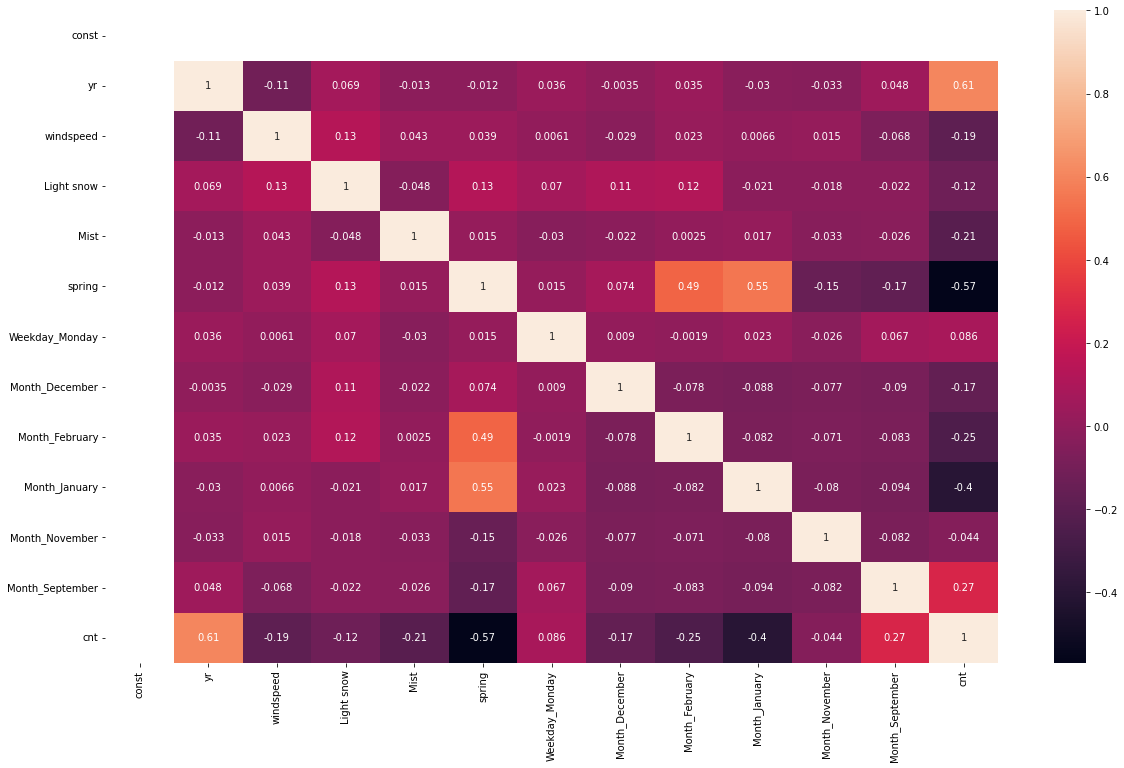

In [155]:
plt.figure(figsize = (20, 12))
sns.heatmap(Correlation_check.corr(), annot = True)
plt.show()

We have filtered out the features that satisfy our conditions. Let's have a look on RFE process, where the feature elimination is done automatically

### RFE method (Fully Automated)

In [111]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [112]:
# Running RFE with the output number of the variable equal to 10
lm_rfe = LinearRegression()
lm_rfe.fit(X_train_rfe, y_train)

LinearRegression()

In [113]:
rfe = RFE(lm_rfe, n_features_to_select = 20)             # running RFE
rfe = rfe.fit(X_train_rfe, y_train)

In [114]:
list(zip(X_train_rfe.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('windspeed', True, 1),
 ('Light snow', True, 1),
 ('Mist', True, 1),
 ('spring', True, 1),
 ('Weekday_Monday', True, 1),
 ('Month_December', True, 1),
 ('Month_February', True, 1),
 ('Month_January', True, 1),
 ('Month_November', True, 1),
 ('Month_September', True, 1)]

In [115]:
X_train_rfe.columns[rfe.support_]

Index(['yr', 'windspeed', 'Light snow', 'Mist', 'spring', 'Weekday_Monday',
       'Month_December', 'Month_February', 'Month_January', 'Month_November',
       'Month_September'],
      dtype='object')

In [116]:
X_train_rfe_new  = X_train_rfe[['yr', 'windspeed', 'Light snow', 'Mist', 'spring', 'Weekday_Monday',
       'Month_December', 'Month_February', 'Month_January', 'Month_November',
       'Month_September']]

In [117]:
X_train_lm_rfe = sm.add_constant(X_train_rfe_new)
lr_rfe = sm.OLS(y_train, X_train_lm_rfe).fit()

In [118]:
lr_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     150.8
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          5.44e-135
Time:                        22:01:26   Log-Likelihood:                 358.89
No. Observations:                 413   AIC:                            -693.8
Df Residuals:                     401   BIC:                            -645.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5106      0.013     38.026      0.000       0.484       0.537
yr                  0.2683      0.010     26.140      0.000       0.248       0.288
windspeed          -0.0788      0.022     -3.519      0.000      -0.123      -0.035
Light snow         -0.3107      0.076     -4.112      0.000      -0.459      -0.162
Mist               -0.0961      0.011     -8.789      0.000      -0.118      -0.075
spring             -0.2019      0.020    -10.354      0.000      -0.240      -0.164
Weekday_Monday      0.0434      0.014      3.002      0.003       0.015       0.072
Month_December     -0.1376      0.020     -6.861      0.000      -0.177      -0.098
Month_February     -0.0938      0.027     -3.461      0.001      -0.147      -0.041
Month_January      -0.1628      0.026     -6.340      0.000      -0.213      -0.112
Month_November     -0.1033      0.021     -4.931      0.000      -0.144      -0.062
Month_September     0.0926      0.019      4.998      0.000       0.056       0.129
==============================================================================
Omnibus:                       60.456   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.513
Skew:                          -0.746   Prob(JB):                     6.86e-32
Kurtosis:                       5.473   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new.values, i) for i in range(X_train_rfe_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,spring,3.43
8,Month_January,2.17
1,windspeed,2.08
7,Month_February,1.94
0,yr,1.63
3,Mist,1.39
6,Month_December,1.18
5,Weekday_Monday,1.16
10,Month_September,1.12
9,Month_November,1.08


### Now we have two final models:

- lr_17 : Linear regression obtained by Manual feature elimination method
- lr_rfe : Linear regression obtained by Recursive feature elimination method

Luckily we have same number of fetaures present for both the models. So the outcome of both the models will give us same result.

### Consider lr_17 as the final model

###  Residual Analysis

In [120]:
y_train_predicted = lr_17.predict(X_train_lm)

In [121]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

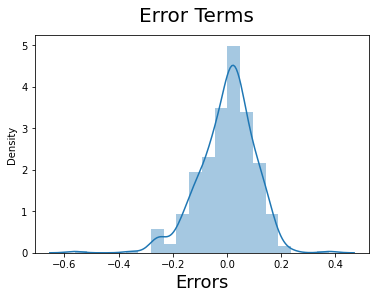

In [122]:
fig = plt.figure()
sns.distplot((y_train - y_train_predicted), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

###  Making Predictions

In [123]:
df_test[numerical_variables] = scaler.fit_transform(df_test[numerical_variables])

In [124]:
y_test = df_test.pop('cnt')
X_test = df_test

In [125]:
X_test = X_test[['yr', 'windspeed', 'Light snow', 'Mist', 'spring', 'Weekday_Monday',
       'Month_December', 'Month_February', 'Month_January', 'Month_November',
       'Month_September']] 

X_test = sm.add_constant(X_test)

In [126]:
y_pred_lr_17 = lr_17.predict(X_test)

In [127]:
X_train = sm.add_constant(X_train)

In [128]:
y_pred_train_lr_17 = lr_17.predict(X_train)

### Model Evaluation

In [129]:
from sklearn.metrics import r2_score

### R square value for train data 

In [130]:
print((round((r2_score(y_train,y_pred_train_lr_17)),5))*100)

80.537


### R square value for testdata 

In [131]:
print((round((r2_score(y_test,y_pred_lr_17)),5))*100)

78.354


#### This plot explains 78.354% of the total variance of the test data

Text(0, 0.5, 'y_pred_lr_17')

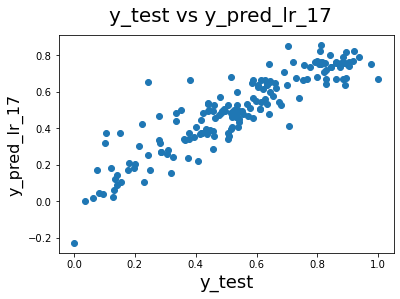

In [132]:
fig = plt.figure()
plt.scatter(y_test,y_pred_lr_17)
fig.suptitle('y_test vs y_pred_lr_17', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred_lr_17', fontsize=16)  

Conclusion

The major features used for predicting is.

- 'yr', 
- 'windspeed', 
- 'Light snow', 
- 'Mist', 
- 'spring', 
- 'Weekday_Monday',
- 'Month_December', 
- 'Month_February', 
- 'Month_January', 
- 'Month_November',
- 'Month_September'